<a href="https://colab.research.google.com/github/bigsteris/Namu-darbai/blob/main/1_Nam%C5%B3_darbas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

from geopy.distance import geodesic
import datetime
import time

### The beginning


#### Download individual file from https://s3.amazonaws.com/tripdata/index.html
The file title is 'YYYYMM-citibike-tripdata.csv.zip'
The LAST STUDENT digit from internal KTU code use for a Year definition i.e.
*   {0,1}==2017
*   {2,3}==2018
*   {4,5}==2019
*   {6,7,8,9}==2020
*   

Prefinal internal KTU code number - for mont definition MM=0x. if x=0, then MM=10
> Dowload file: 'YYYYMM-citibike-tripdata.csv.zip'


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
citybike = pd.read_csv('/content/drive/MyDrive/IVSP/1nd/202010-citibike-tripdata.csv')

In [7]:
citybike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1403,2020-10-01 00:00:10.7870,2020-10-01 00:23:34.5400,224,Spruce St & Nassau St,40.711464,-74.005524,3347,Van Brunt St & Wolcott St,40.677343,-74.012751,39079,Subscriber,1995,1
1,462,2020-10-01 00:00:18.2390,2020-10-01 00:08:00.5710,3161,W 76 St & Columbus Ave,40.780184,-73.977285,3158,W 63 St & Broadway,40.771639,-73.982614,41267,Subscriber,1998,2
2,770,2020-10-01 00:00:21.3070,2020-10-01 00:13:12.0840,354,Emerson Pl & Myrtle Ave,40.693631,-73.962236,3761,Cedar St & Myrtle Ave,40.697842,-73.926241,47398,Customer,1996,1
3,233,2020-10-01 00:00:25.0080,2020-10-01 00:04:18.6410,3141,1 Ave & E 68 St,40.765005,-73.958185,464,E 56 St & 3 Ave,40.759345,-73.967597,36482,Subscriber,1993,1
4,126,2020-10-01 00:00:25.3100,2020-10-01 00:02:32.1330,335,Washington Pl & Broadway,40.729039,-73.994046,229,Great Jones St,40.727434,-73.993790,45319,Subscriber,1989,1


1. Find the total number of records and columns as well as statistics "describe" of the data.

In [8]:
a=citybike.shape
print('number of records: ',a[0])
print('number of columns: ',a[1])

number of records:  2248869
number of columns:  15


In [9]:
citybike.describe

<bound method NDFrame.describe of          tripduration                 starttime                  stoptime  \
0                1403  2020-10-01 00:00:10.7870  2020-10-01 00:23:34.5400   
1                 462  2020-10-01 00:00:18.2390  2020-10-01 00:08:00.5710   
2                 770  2020-10-01 00:00:21.3070  2020-10-01 00:13:12.0840   
3                 233  2020-10-01 00:00:25.0080  2020-10-01 00:04:18.6410   
4                 126  2020-10-01 00:00:25.3100  2020-10-01 00:02:32.1330   
...               ...                       ...                       ...   
2248864          1120  2020-10-31 23:59:48.4470  2020-11-01 00:18:29.3280   
2248865           859  2020-10-31 23:59:49.3770  2020-11-01 00:14:09.1920   
2248866           546  2020-10-31 23:59:52.1040  2020-11-01 00:08:59.0710   
2248867           748  2020-10-31 23:59:53.0290  2020-11-01 00:12:21.7830   
2248868          1366  2020-10-31 23:59:57.9770  2020-11-01 00:22:44.1290   

         start station id                

2. Scatter plot data detween 'birth year' and 'tripduration' (use a **DF.plot.scatter**, s = 100) as well as **DF.plot.hist** of 'birth year' collumn into number of bins from your internal code 2 last digits xxxXX (bins=XX).

<Axes: xlabel='birth year', ylabel='tripduration'>

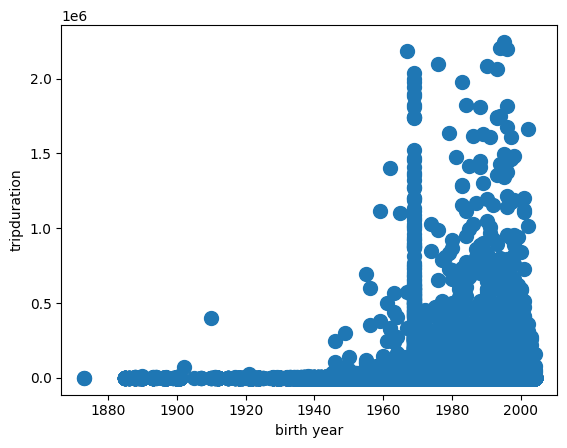

In [10]:
citybike.plot.scatter(x='birth year',y='tripduration',s=100)

.

.

.

<Axes: ylabel='Frequency'>

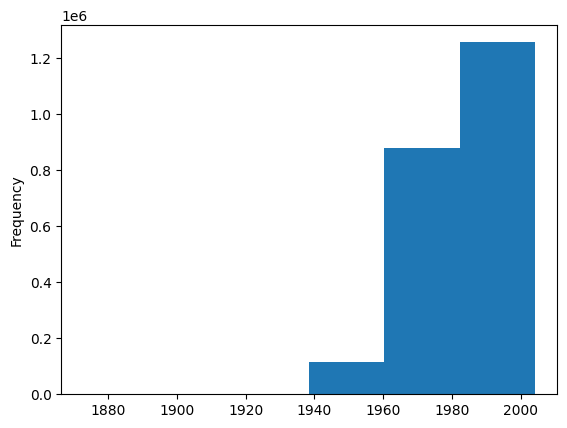

In [11]:
citybike['birth year'].plot.hist(by=None, bins=6) #paskutiniai du skaičiai 06


Find average trip duration in minutes (column: tripduration) with 2 numbers precision (use 'round' function).

In [12]:
avr_duration=round(citybike['tripduration'].mean()/60,2)
print(avr_duration)

20.22


How many trips have started and ended at the same station?

In [13]:
trips=citybike[(citybike['start station id'] == citybike['end station id'])].shape
print(trips[0])

88632


How many trips have stared and ended at the same station with the UNIQUE bike_ID? (i.e. DF.unique().shape)

In [14]:
unique_trips=citybike[(citybike['start station id'] == citybike['end station id'])]['bikeid'].unique().shape
print(unique_trips[0])

17145


Which bike was most offten used (bikeid) in a town and how many times?

In [15]:
max_bike_ID=citybike['bikeid'].value_counts().keys().tolist()
times_used=citybike['bikeid'].value_counts().tolist()
print('The bikeid of the most used bike: ' ,max_bike_ID[0])
print('Times used: ',times_used[0])

The bikeid of the most used bike:  36074
Times used:  451


Find a bike (bikeid), who had the longest trip duration on average. (i.e. use a **DF.mean()** and **sort_values()**)

In [16]:
avr_trip_times=citybike.groupby('bikeid')['tripduration'].mean().sort_values(ascending=False)
longest_duration_bikeid=avr_trip_times.keys().tolist()
print('Bikeid of the bike: ' ,longest_duration_bikeid[0])

Bikeid of the bike:  41672


Find the number of missing records (i.e. null) in the column 'start station id'.

In [17]:
null_times=citybike[citybike['start station id'].isnull()].shape
print('Number of missing records: ',null_times[0])

Number of missing records:  0


Find the average distance between stations (apriory removing lines: start station id = end station id).

Hint: use the library **geopy** and distance measure **geodesic** (min distance between two geo locations) p.s.: https://geopy.readthedocs.io/en/stable/#module-geopy.distance


In [18]:
citybike['distance_km'] = citybike.apply(lambda x: geodesic((x['start station latitude'], x['start station longitude']),
                                                            (x['end station latitude'], x['end station longitude'])).kilometers, axis=1)




In [19]:
print('average distance: ' ,citybike['distance_km'].mean())


average distance:  2.110053167630986
